In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [191]:
data = pd.read_csv("Data\\train.csv")

## Data Analysis and Visualization

In [192]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [194]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

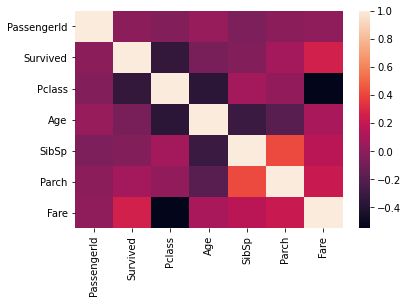

In [195]:
sns.heatmap(data.corr())

# From the heat map below, It can be seen hat Pclass and Fare columns effect the Survived column the most

### Survived

<AxesSubplot:xlabel='Survived'>

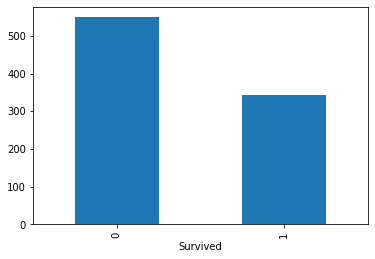

In [196]:
# Distrubition of people dead and stayed alive, dead = 0, alive = 1
data.value_counts("Survived").plot(kind = "bar")

### Age

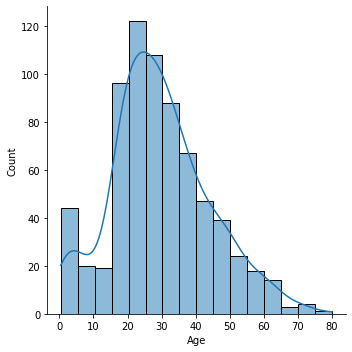

In [197]:
# Age Distrubition
sns.displot(data = data["Age"], kde = True, bins = 16)

# Most of the poople in the ship are between 15-40

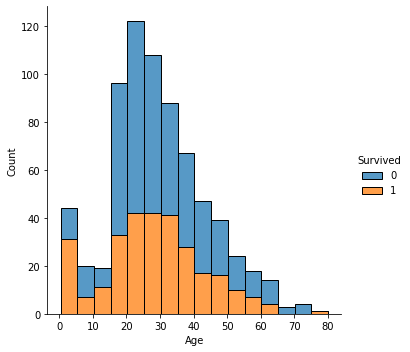

In [198]:
# Survived-Unsurvived depends on Age
sns.displot(data = data, x = "Age", hue = "Survived", bins = 16, multiple="stack")

# According to the graph below, we can examine that:
# - Most of the children under 15 survived
# - Most amount of death are from adults(Specially in the range between ~16 - 50)

### Sex

<AxesSubplot:xlabel='Sex'>

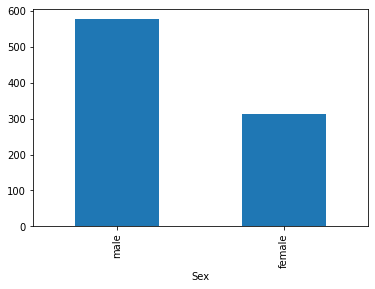

In [199]:
# Distrubition of Sex
data.value_counts("Sex").plot(kind = "bar")

<AxesSubplot:xlabel='Survived', ylabel='count'>

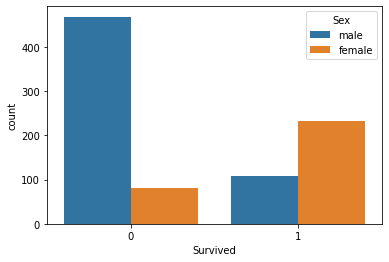

In [200]:
# Survived-Unsurvived depend on Sex
sns.countplot(data = data, x = "Survived", hue = "Sex")

# Most of the people who died are men

### P Class

<AxesSubplot:xlabel='Pclass'>

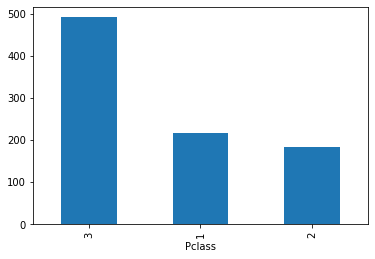

In [201]:
# Distrubition of Ticket Classes
data.value_counts("Pclass").plot(kind = "bar")

<AxesSubplot:xlabel='Survived', ylabel='count'>

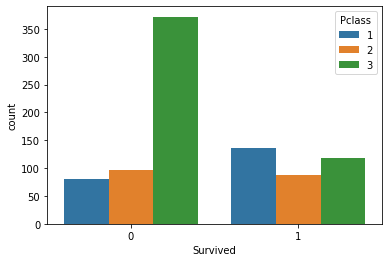

In [202]:
# Survived-Unsurvived depends on ticket classes
sns.countplot(x = "Survived", hue = "Pclass", data = data)

# We can clearly see that when the class of the ticket decrases, amount of dead increases. Money talks

### Fare

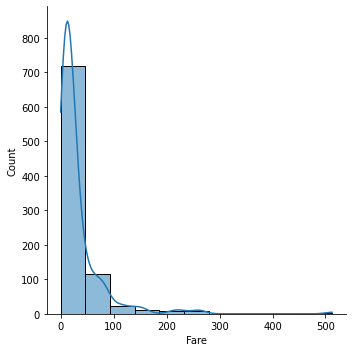

In [203]:
sns.displot(data = data["Fare"], kde = True, bins = 11)

### Embarkation

<AxesSubplot:xlabel='Embarked', ylabel='count'>

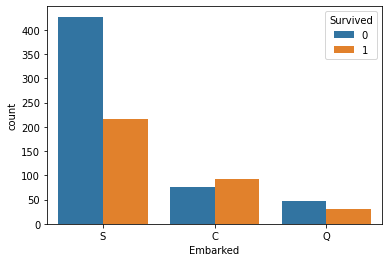

In [204]:
sns.countplot(data = data, x = "Embarked", hue = "Survived")

# Most of the people embarked from port of Southampton(S)
# Most people died are also embarked from Southampton(S), but in percentage, Queenstown(Q) has the most

## Data Processing

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
data.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)  # Dropping Unnecessary columns

In [207]:
data["Age"].fillna(data["Age"].median(), inplace = True) # Filling null age values with median value

In [208]:
# Age should be transformed to categorical data, having it in int value is not healthly since there is no positive ratio between age and death
data['AgeBin'] = pd.cut(data['Age'], bins=[0,12,20,40,81], labels=['Children','Teenage','Adult','Elder'])

In [209]:
data["Family"] = data.SibSp + data.Parch  # Since SibSp and Parch are about the number of family members, we can just sum them

In [210]:
data.drop(["SibSp", "Parch"], axis = 1, inplace = True)

In [211]:
data["Fare"].fillna(data["Fare"].median(), inplace = True)
data['FareBin'] = pd.qcut(data['Fare'], 5, labels = ["poor", "low_mid", "mid", "mid_high", "rich"])   # Dividing the fare into 5 parts;  Poor - Low_mid - Mid - mid_high - Rich

In [212]:
data.dropna(axis = 0, inplace = True)
# We have ony 2 null values in Embarked class, We could make a classifier machine learning model in order to predict those two's class, but no need effort for only 2 values

In [213]:
lbe = LabelEncoder()

data["Gender"] = lbe.fit_transform(data["Sex"])
data = pd.get_dummies(data, columns = ["Pclass", "Embarked", "AgeBin", "FareBin"], prefix = ["Pclass", "Embarked", "AgeBin", "FareBin"])
data.drop(["Sex", "Age", "Fare"], axis = 1, inplace = True)

In [214]:
data.head()

,PassengerId,Survived,Family,Gender,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,AgeBin_Children,AgeBin_Teenage,AgeBin_Adult,AgeBin_Elder,FareBin_poor,FareBin_low_mid,FareBin_mid,FareBin_mid_high,FareBin_rich
0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
1,2,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,4,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,5,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0


In [215]:
x = data.drop(["PassengerId", "Survived"], axis = 1)
y = data["Survived"]

## Modelling

In [216]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [217]:
# I will be applying many models with different parameters, to avoid writing the same codes over and over, I define a simple function for it

def analyse(model, xTrain, yTrain, xTest, yTest):
    model.fit(xTrain, yTrain)                         # Train the model
    pred = model.predict(xTest)                       # predict
    plot_confusion_matrix(model, xTest, yTest)        # Plot confusion matrix
    plt.show()                                        # show the confusion matrix
    acc = round(accuracy_score(yTest, pred), 3) * 100 # calculate the accuracy
    print(f"Accuracy: {acc}%\n--------")                        # Type the accuracy
    

### Logistic Regression

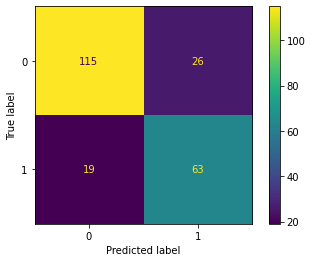

Accuracy: 79.80000000000001%
--------


In [218]:
logistic = LogisticRegression()
analyse(logistic, xTrain, yTrain, xTest, yTest)

### KNN

n = 2


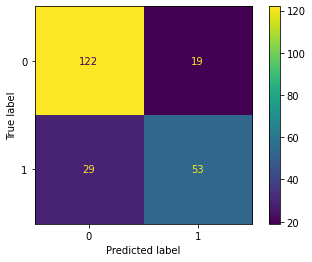

Accuracy: 78.5%
--------
n = 3


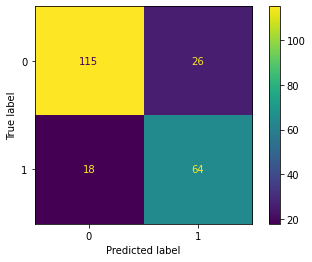

Accuracy: 80.30000000000001%
--------
n = 4


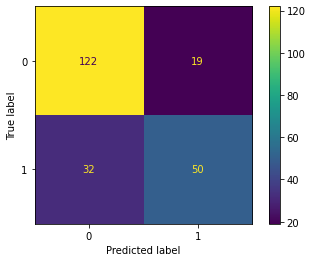

Accuracy: 77.10000000000001%
--------
n = 5


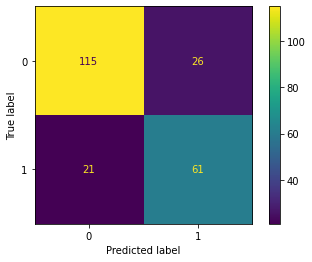

Accuracy: 78.9%
--------


In [219]:
for i in range(2, 6):
    knn = KNeighborsClassifier(n_neighbors = i)
    print(f"n = {i}")
    analyse(knn, xTrain, yTrain, xTest, yTest)

### SVM

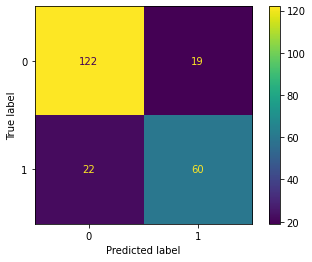

Accuracy: 81.6%
--------


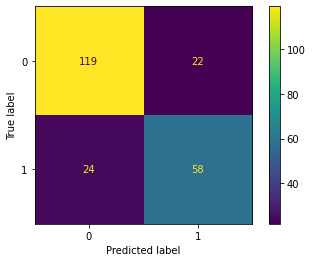

Accuracy: 79.4%
--------


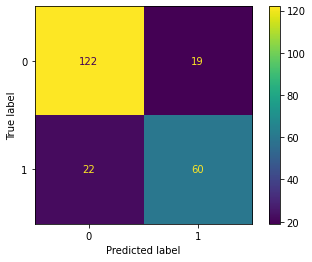

Accuracy: 81.6%
--------


In [220]:
svcList = [SVC(), SVC(kernel = "linear"), SVC(kernel = "poly")]

for i in svcList:
    analyse(i, xTrain, yTrain, xTest, yTest)

### Random Forest

n = 100


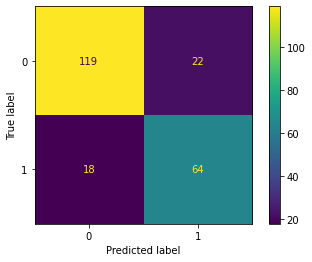

Accuracy: 82.1%
--------
n = 200


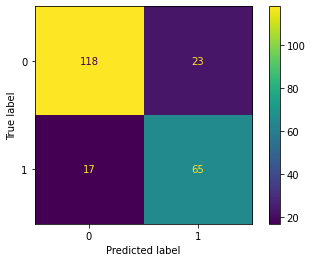

Accuracy: 82.1%
--------
n = 300


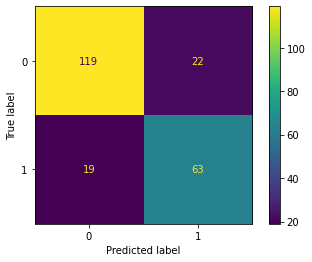

Accuracy: 81.6%
--------
n = 400


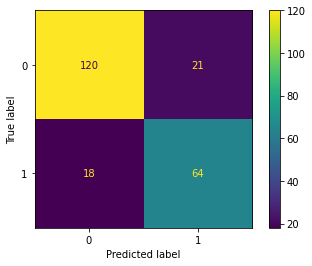

Accuracy: 82.5%
--------
n = 500


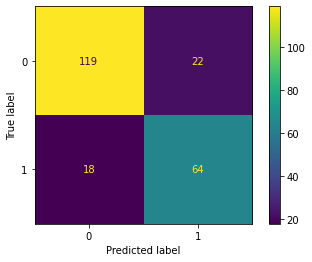

Accuracy: 82.1%
--------


In [221]:
for i in range(100, 600, 100):
    randomForest = RandomForestClassifier(n_estimators=i)
    print(f"n = {i}")
    analyse(randomForest, xTrain, yTrain, xTest, yTest)


### XGBoost

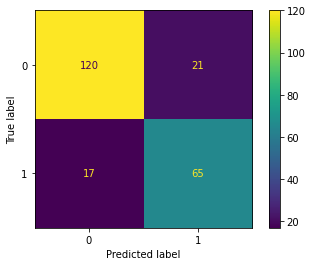

Accuracy: 83.0%
--------


In [222]:
xgb = XGBClassifier()
analyse(xgb, xTrain, yTrain, xTest, yTest)

## Model Tuning

#### In the conclusion, XGBoost and Random Forest(n = 400) become the best models for the data <br>
#### But XGBoost beats the Random Forest model with a small difference, now, I will apply Model Tuning by RandomizedSearchCV

In [172]:
params = {
 "learning_rate" : [0.05,0.10,0.20,0.3,0.35, 0.4],
 "max_depth" : [3, 4, 5, 6, 8, 10],
 "min_child_weight" : [1, 3, 5],
 "gamma": [0, 0.1, 0.2, 0.3],
 "colsample_bytree" : [0.5, 1],
 "n_estimators": [100, 200, 500]
}

xgb = XGBClassifier()

xgbRS=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
xgbRS.fit(x, y)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [173]:
xgbRS.best_params_

{'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 1}

In [174]:
xgbTuned = XGBClassifier(colsample_bytree = 1,
 learning_rate = 0.1,
 max_depth = 8,
 n_estimators = 100,
 gamma = 0.1,
 min_child_weight = 1
)

xgbTuned.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Predicting The Test Data

In [182]:
testData = pd.read_csv("Data\\test.csv")

In [183]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [184]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [185]:
# Applying the same data process steps we used for train data

testData.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)  
testData["Age"].fillna(testData["Age"].median(), inplace = True) 
testData['AgeBin'] = pd.cut(testData['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
testData["Family"] = testData.SibSp + testData.Parch
testData.drop(["SibSp", "Parch"], axis = 1, inplace = True)
testData["Fare"].fillna(testData["Fare"].median(), inplace = True)
testData['FareBin'] = pd.qcut(testData['Fare'], 5, labels = ["poor", "low_mid", "mid", "mid_high", "rich"])

testData["Gender"] = lbe.fit_transform(testData["Sex"])
testData = pd.get_dummies(testData, columns = ["Pclass", "Embarked", "AgeBin", "FareBin"], prefix = ["Pclass", "Embarked", "AgeBin", "FareBin"])
testData.drop(["Sex", "Age", "Fare"], axis = 1, inplace = True)

In [186]:
testData.head()

,PassengerId,Family,Gender,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,AgeBin_Children,AgeBin_Teenage,AgeBin_Adult,AgeBin_Elder,FareBin_poor,FareBin_low_mid,FareBin_mid,FareBin_mid_high,FareBin_rich
0,892,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,893,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
2,894,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,895,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
4,896,2,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [187]:
predicts = xgbTuned.predict(testData.drop("PassengerId", axis = 1))

## Exporting The Results as .csv File for Submission

In [188]:
result = pd.DataFrame({
    "PassengerId": testData["PassengerId"],
    "Survived": predicts
})

In [189]:
result.to_csv("result.csv", index = False)